#  Multiple Linear Regression

### GDP Example

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 

### Getting the data from the Penn World tables website



In [2]:
url = 'https://dataverse.nl/api/access/datafile/354095'
data = pd.read_excel(url, 'Data')

data.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

In [4]:
data['year'].value_counts()

year
1950    183
1994    183
2000    183
1999    183
1998    183
       ... 
1979    183
1980    183
1981    183
1982    183
2019    183
Name: count, Length: 70, dtype: int64

# 

## Selecting, renaming and  transforming variables

In [5]:
data = data[data['year']==2019]
data = data[['rgdpo', 'country', 'pop', 'cn']]
data.head()

data.rename(columns={'rgdpo': 'Real GDP', 'country': 'Country', 'pop': 'Population', 'cn': 'Capital Stock'}, inplace=True)

data.set_index('Country', inplace=True)
data.head()

,Real GDP,Population,Capital Stock
Country,,,
Aruba,3467.299561,0.106314,1.742797e+04
Angola,227855.718750,31.825295,1.299232e+06
Anguilla,225.680527,0.014869,2.266816e+03
Albania,36103.042969,2.880917,2.239714e+05
United Arab Emirates,645956.250000,9.770529,4.453746e+06


# 

### Cleaning and transforming variables

In [6]:
data['Log Real GDP'] = np.log(data['Real GDP'])
data['Log Population'] = np.log(data['Population'])
data['Log Capital Stock'] = np.log(data['Capital Stock'])

data.head()

data.isna().sum()

data.dropna(inplace=True)

# 

### Choosing predicting and target variables

In [7]:
y = data['Log Real GDP']
x = data.drop(['Log Real GDP', 'Real GDP', 'Population', 'Capital Stock'], axis=1)

# Let's create the intercept and put it in the first column
x['Intercept'] = 1
first_column = x.pop('Intercept') 

x.insert(0, 'Intercept', first_column)
x.head()

,Intercept,Log Population,Log Capital Stock
Country,,,
Aruba,1,-2.241358,9.765831
Angola,1,3.460261,14.077283
Anguilla,1,-4.208477,7.726132
Albania,1,1.058109,12.319274
United Arab Emirates,1,2.279371,15.309256


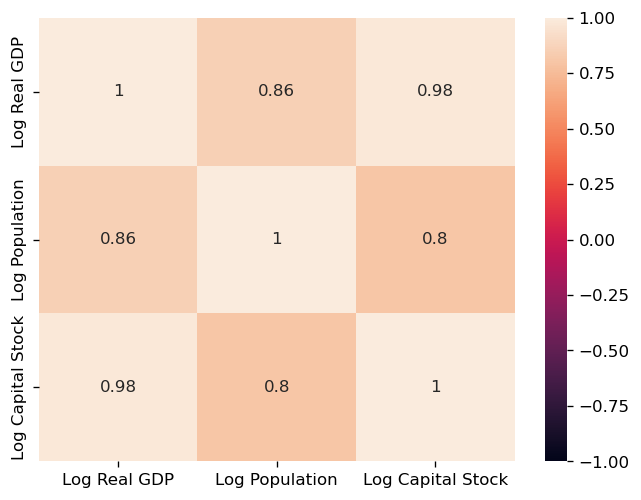

In [8]:
# Let's see the correlation heatmap
plt.figure(dpi=120)
sns.heatmap(data[['Log Real GDP', 'Log Population', 'Log Capital Stock']].corr(), 
            vmin=-1, vmax=1, annot=True)

plt.show()

#### There is unfortunately very high correlation between our two predicting variables

# 

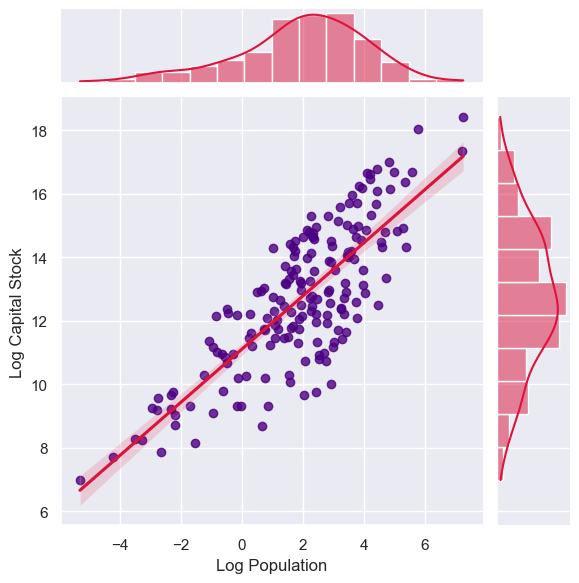

In [30]:
# The jointplot show us how closely both variables they follow each other

sns.set_theme()
sns.jointplot(data=data, x='Log Population', y='Log Capital Stock', 
              color='crimson', kind='reg', scatter_kws={"color": "indigo"})

plt.show()

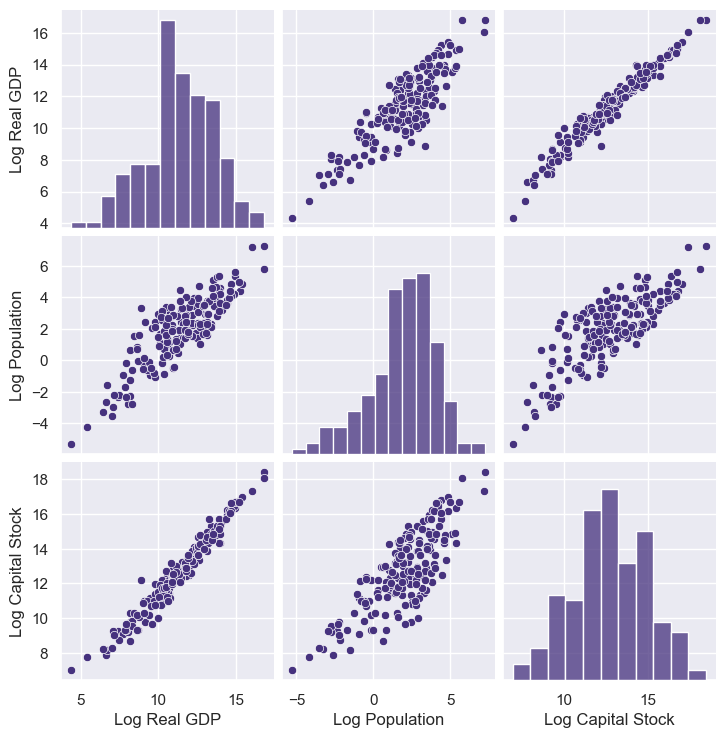

In [18]:
# A pairplot creates a scatterplot for every combination of two variables 
#plus a histogram for each variable

sns.set_theme(palette='viridis')
sns.pairplot(data=data[['Log Real GDP', 'Log Population', 'Log Capital Stock']])
plt.show()

#

## Fitting a Multiple Linear Regression with OLS

In [24]:
model = sm.OLS(y, x)
results = model.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})


print('R Squared:', results.rsquared, '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)

R Squared: 0.9700763856129261 

                      betas  std error  t-statistic      p-values
Intercept          0.693306   0.243271     2.849935  4.891907e-03
Log Population     0.215558   0.022590     9.542364  1.134418e-17
Log Capital Stock  0.807529   0.021627    37.338254  7.646722e-86


#### All coefficients are statistically significant and the variables explain over 97% of the observed variability

# 

In [27]:
# let's create a variable for each coefficient
const = Summary.loc['Intercept', 'betas']
alpha = Summary.loc['Log Population', 'betas']
beta = Summary.loc['Log Capital Stock', 'betas']

print('alpha + beta =', alpha + beta)

alpha + beta = 1.0230877269491254


#### alpha + beta is bigger than 1, therefore, on average, there are increasing returns to scale

# 

## Regression and residual plots

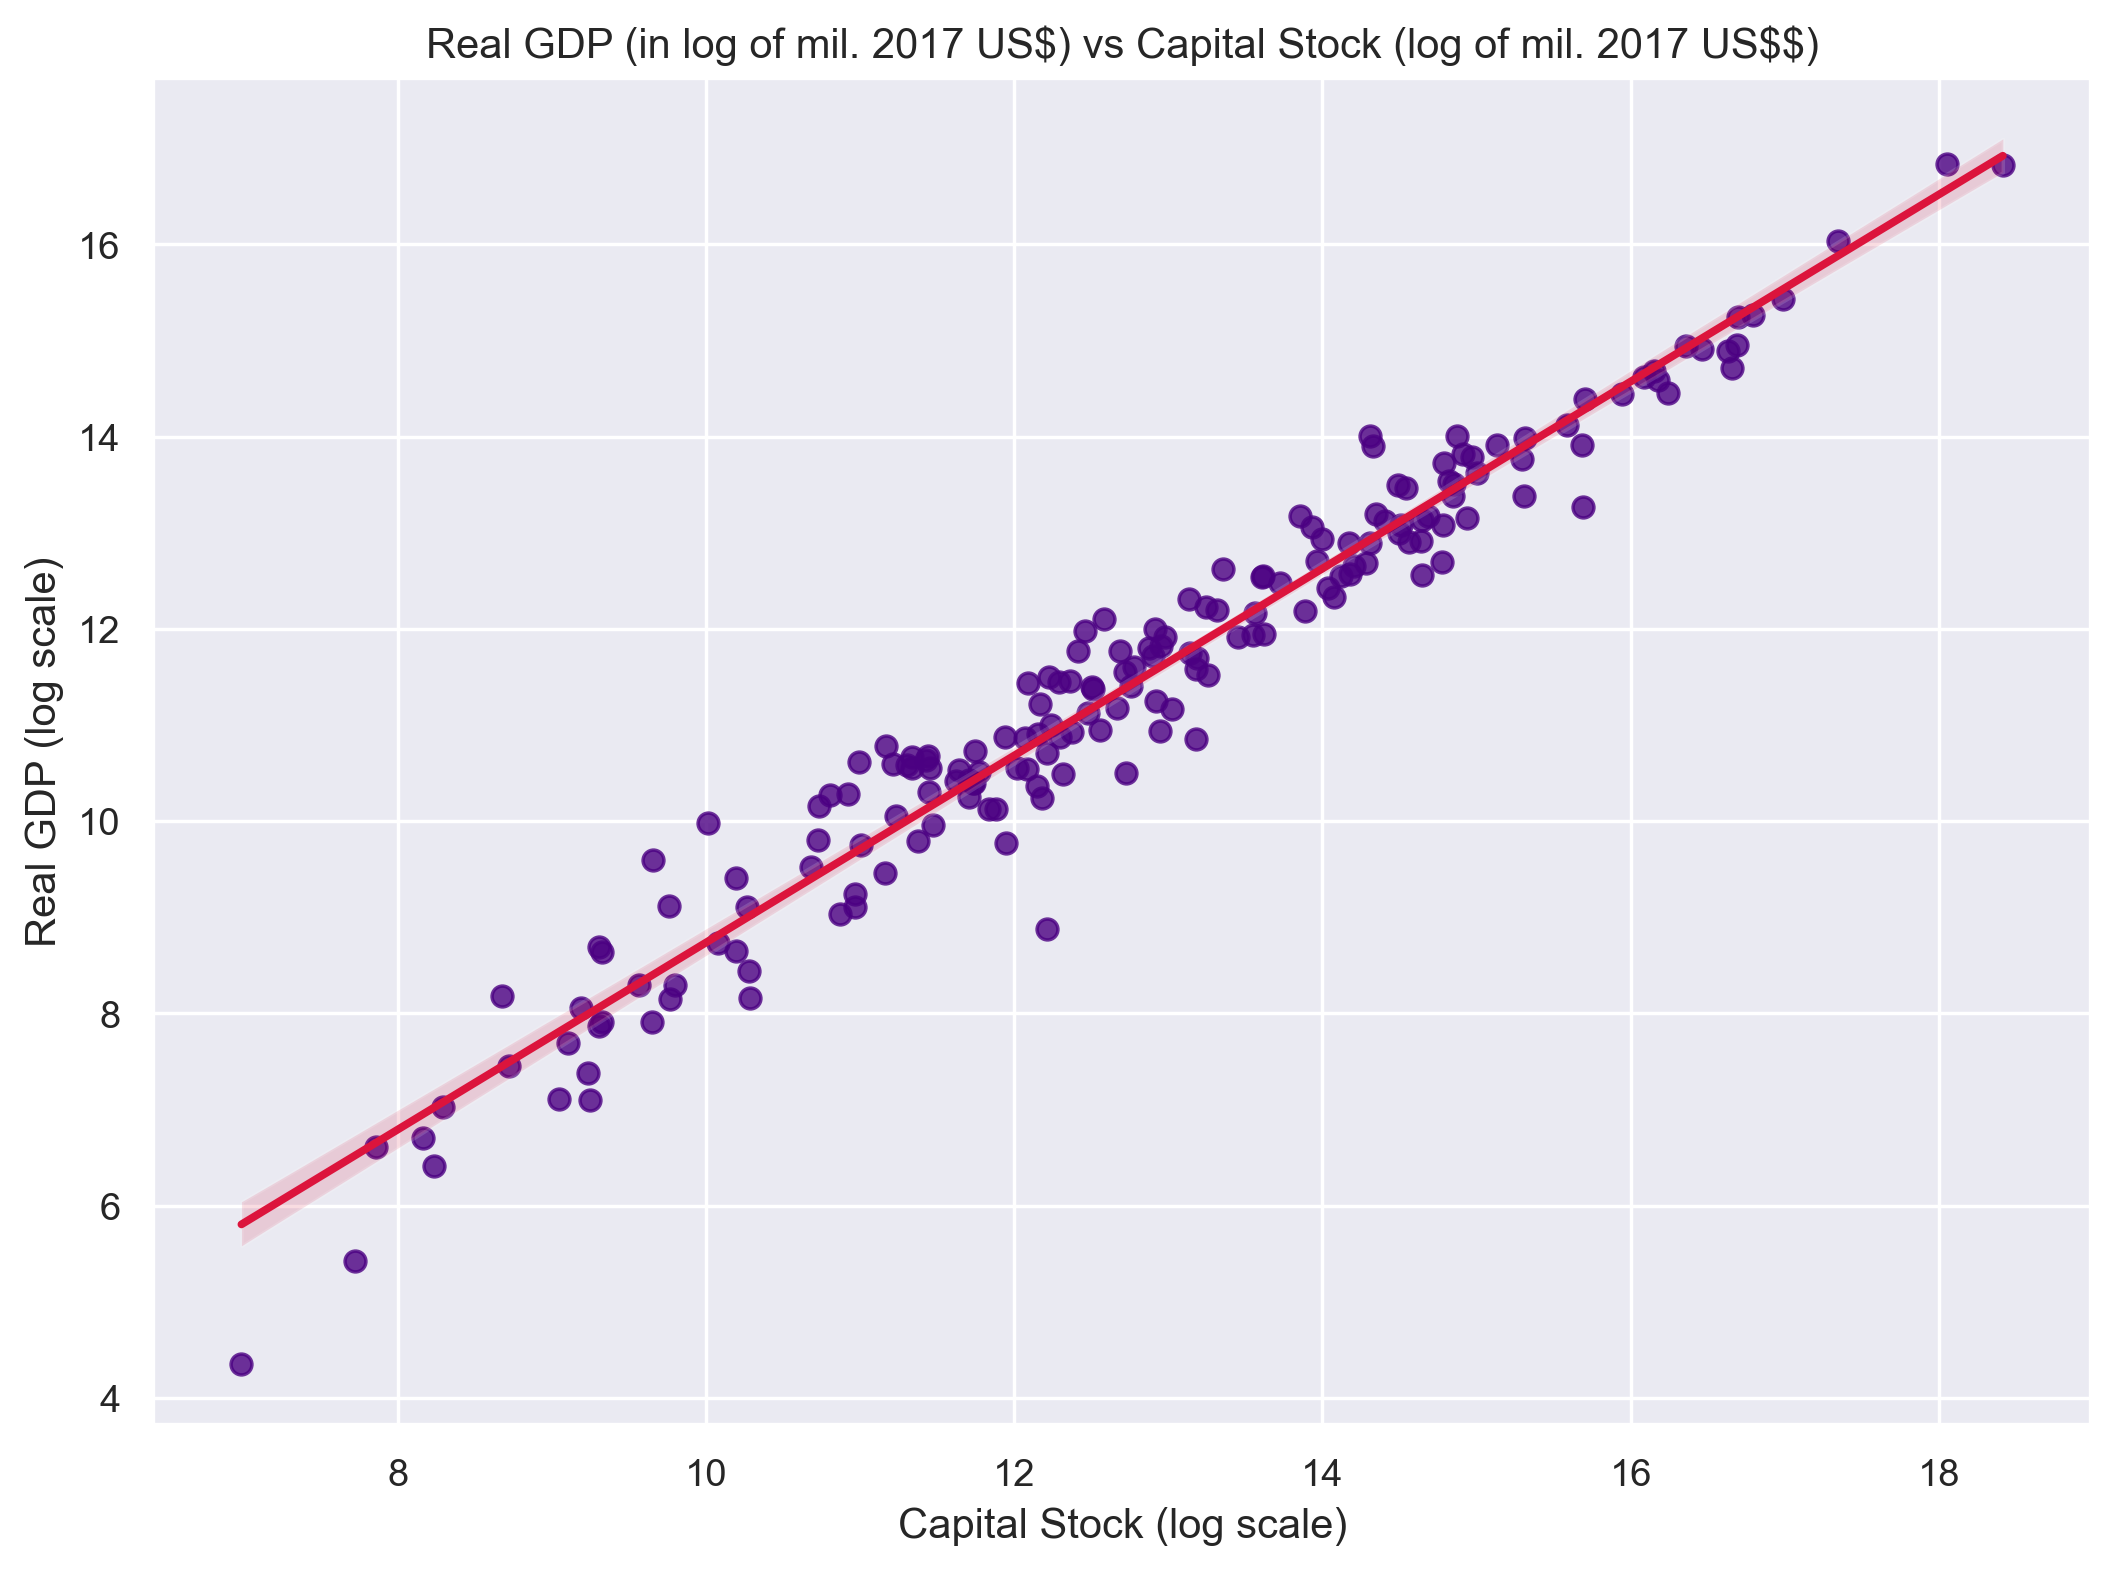

In [33]:
# Regression plot: Log GDP vs Log Capital Stock
plt.figure(figsize=(10,7), dpi=250)
sns.set_theme()
sns.regplot(data=data, x='Log Capital Stock', y='Log Real GDP', 
scatter_kws={"color": "indigo"}, line_kws={"color": "crimson"})

# Label
plt.ylabel('Real GDP (log scale)')
plt.xlabel('Capital Stock (log scale)')
plt.title('Real GDP (in log of mil. 2017 US$) vs Capital Stock (log of mil. 2017 US$$)')
plt.show()

# 

### Residuals

In [38]:
resid = pd.DataFrame(results.resid).rename(columns={0: 'Residuals'})

resid

,Residuals
Country,
Aruba,0.054772
Angola,-0.470547
Anguilla,-0.606092
Albania,-0.375434
United Arab Emirates,-0.168831
...,...
Viet Nam,0.113698
Yemen,-1.210291
South Africa,-0.056974


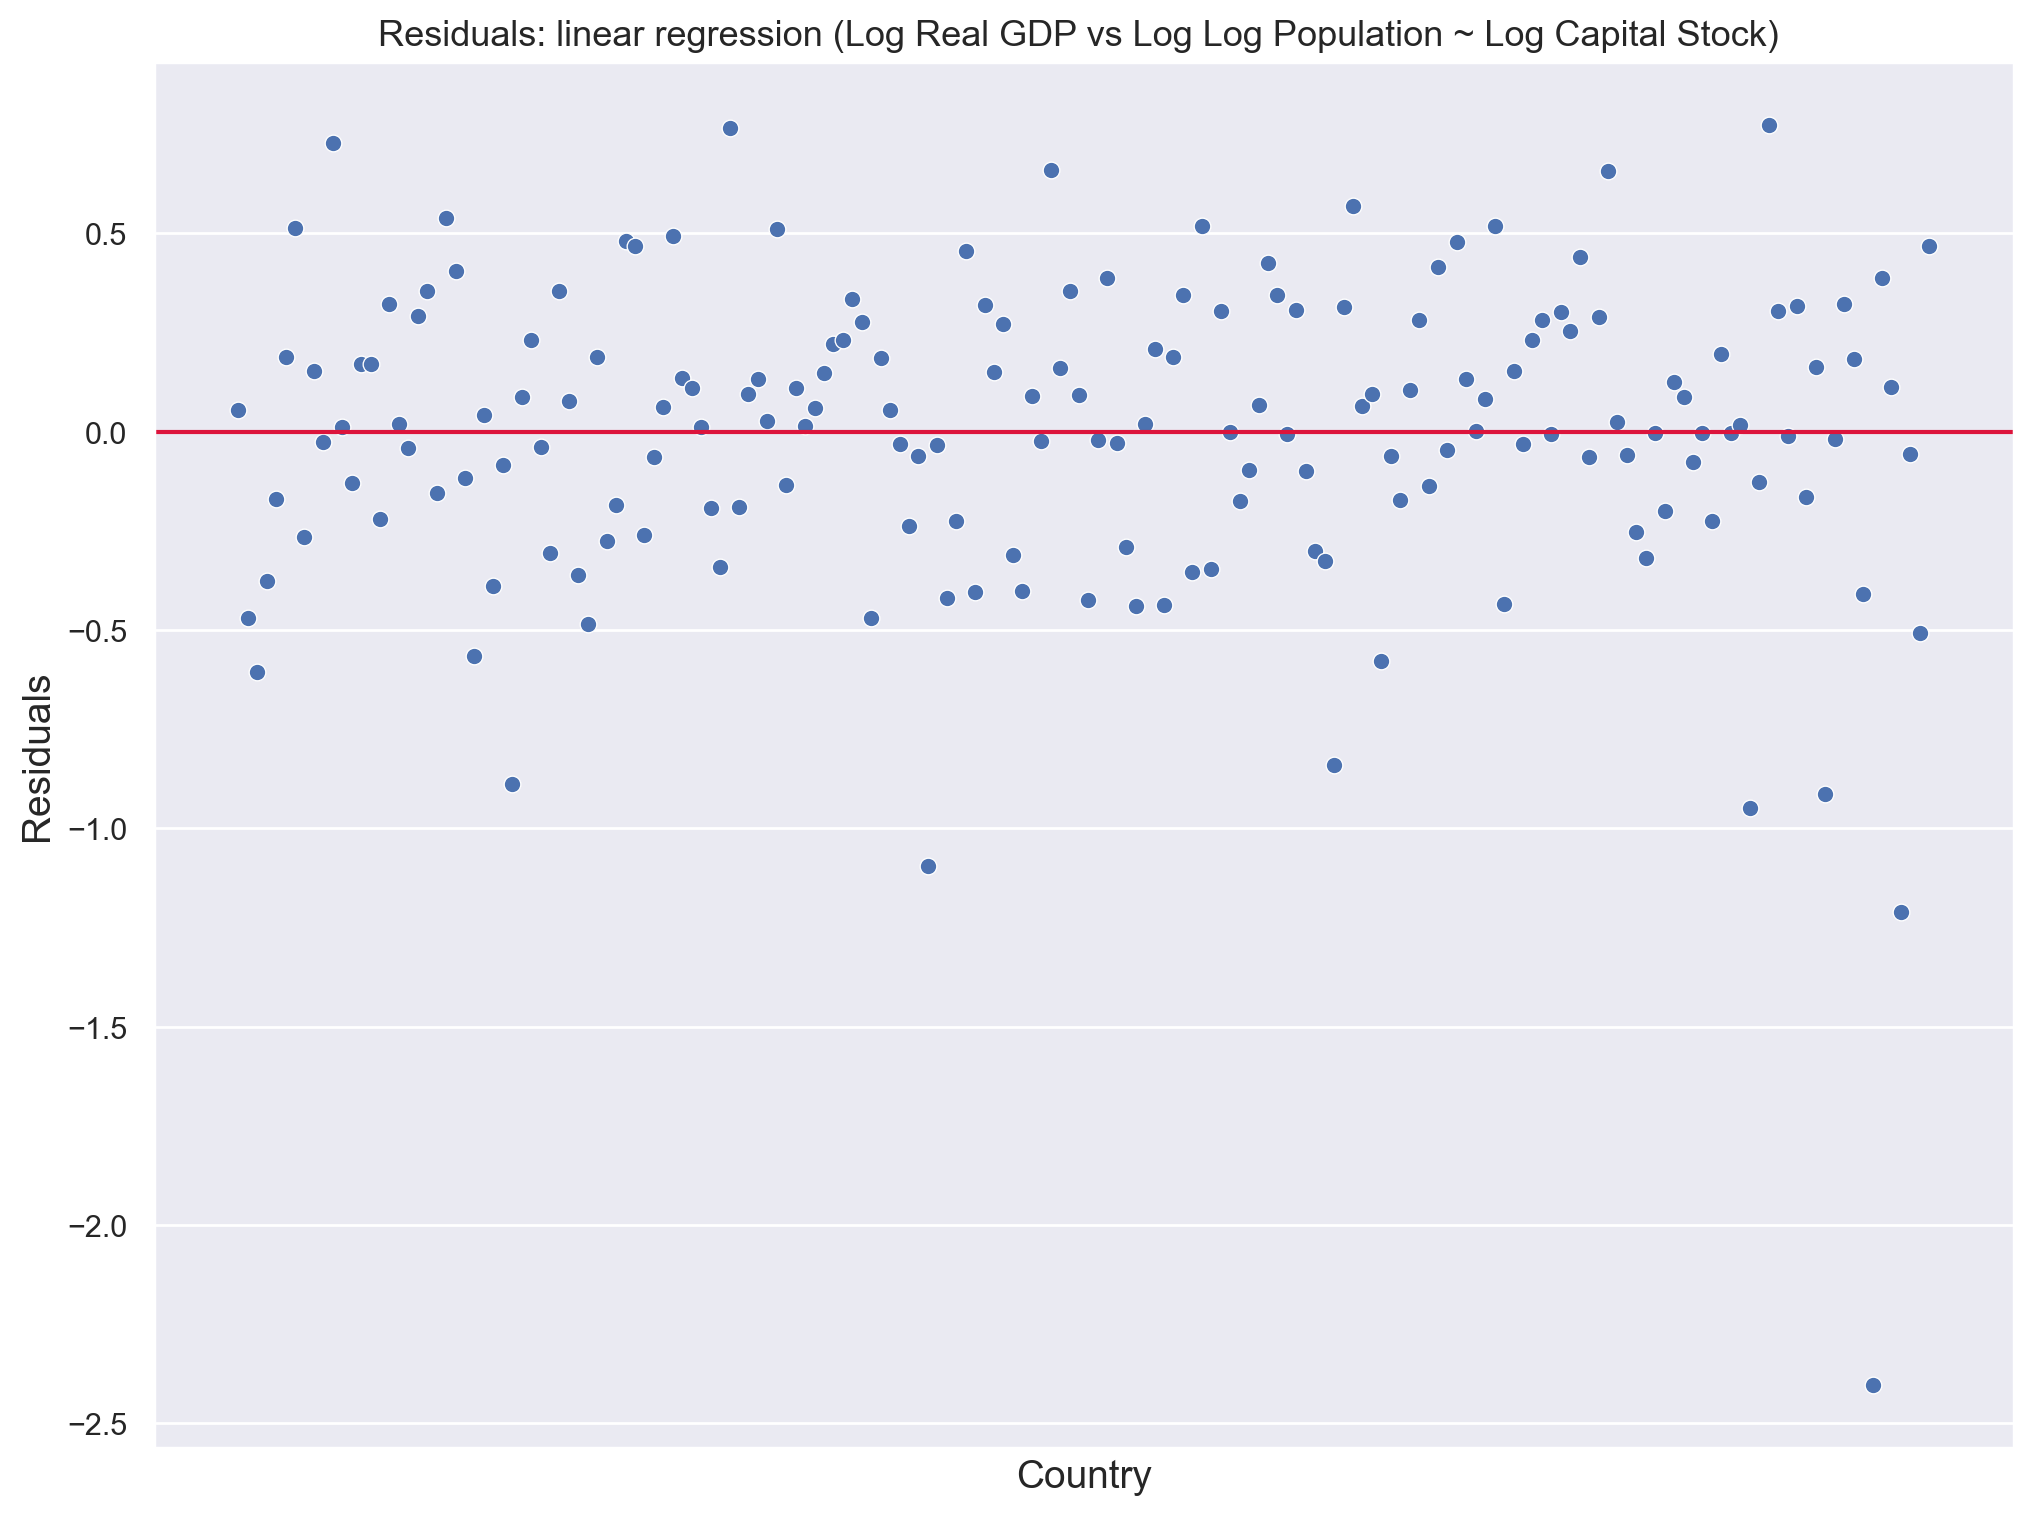

In [39]:
#Residuals plot: Log GDP vs Log Population ~ Log Capital Stock
plt.figure(figsize=(12,9), dpi=200)
sns.set_theme()
sns.scatterplot(data=resid, x=resid.index, y='Residuals')
plt.axhline(y=0, color='crimson')

# Labels
plt.xlabel('Country', size=14)
plt.ylabel('Residuals', size=14)
plt.title('Residuals: linear regression (Log Real GDP vs Log Log Population ~ Log Capital Stock) ', size=13)

plt.xticks([], [])
plt.show()

#

#### Two ways of calculating the total factor productivity

In [81]:
# First
TFP = data['Real GDP']/np.exp(alpha*data['Log Population'] + beta*data['Log Capital Stock'])
TFP = pd.DataFrame(TFP).rename(columns={0:'TFP'})
TFP.sort_values(by='TFP', ascending=False)

,TFP
Country,
Trinidad and Tobago,4.338541
Egypt,4.302770
Azerbaijan,4.145253
Kazakhstan,3.866427
Sierra Leone,3.863290
...,...
Ukraine,0.802333
Tajikistan,0.774384
Haiti,0.669824


In [87]:
# Second
# Both ways must yield identical results
TFP = np.exp(const + resid['Residuals'])
TFP = pd.DataFrame(TFP).rename(columns={'Residuals':'TFP'})
TFP.sort_values(by='TFP', ascending=True)

,TFP
Country,
Venezuela (Bolivarian Republic of),0.180894
Yemen,0.596316
Haiti,0.669824
Tajikistan,0.774384
Ukraine,0.802333
...,...
Sierra Leone,3.863290
Kazakhstan,3.866427
Azerbaijan,4.145253


In [90]:
# Lastly we might calculate average  TFP as
TFP_av = np.exp(const)
TFP_av

2.000317066921355

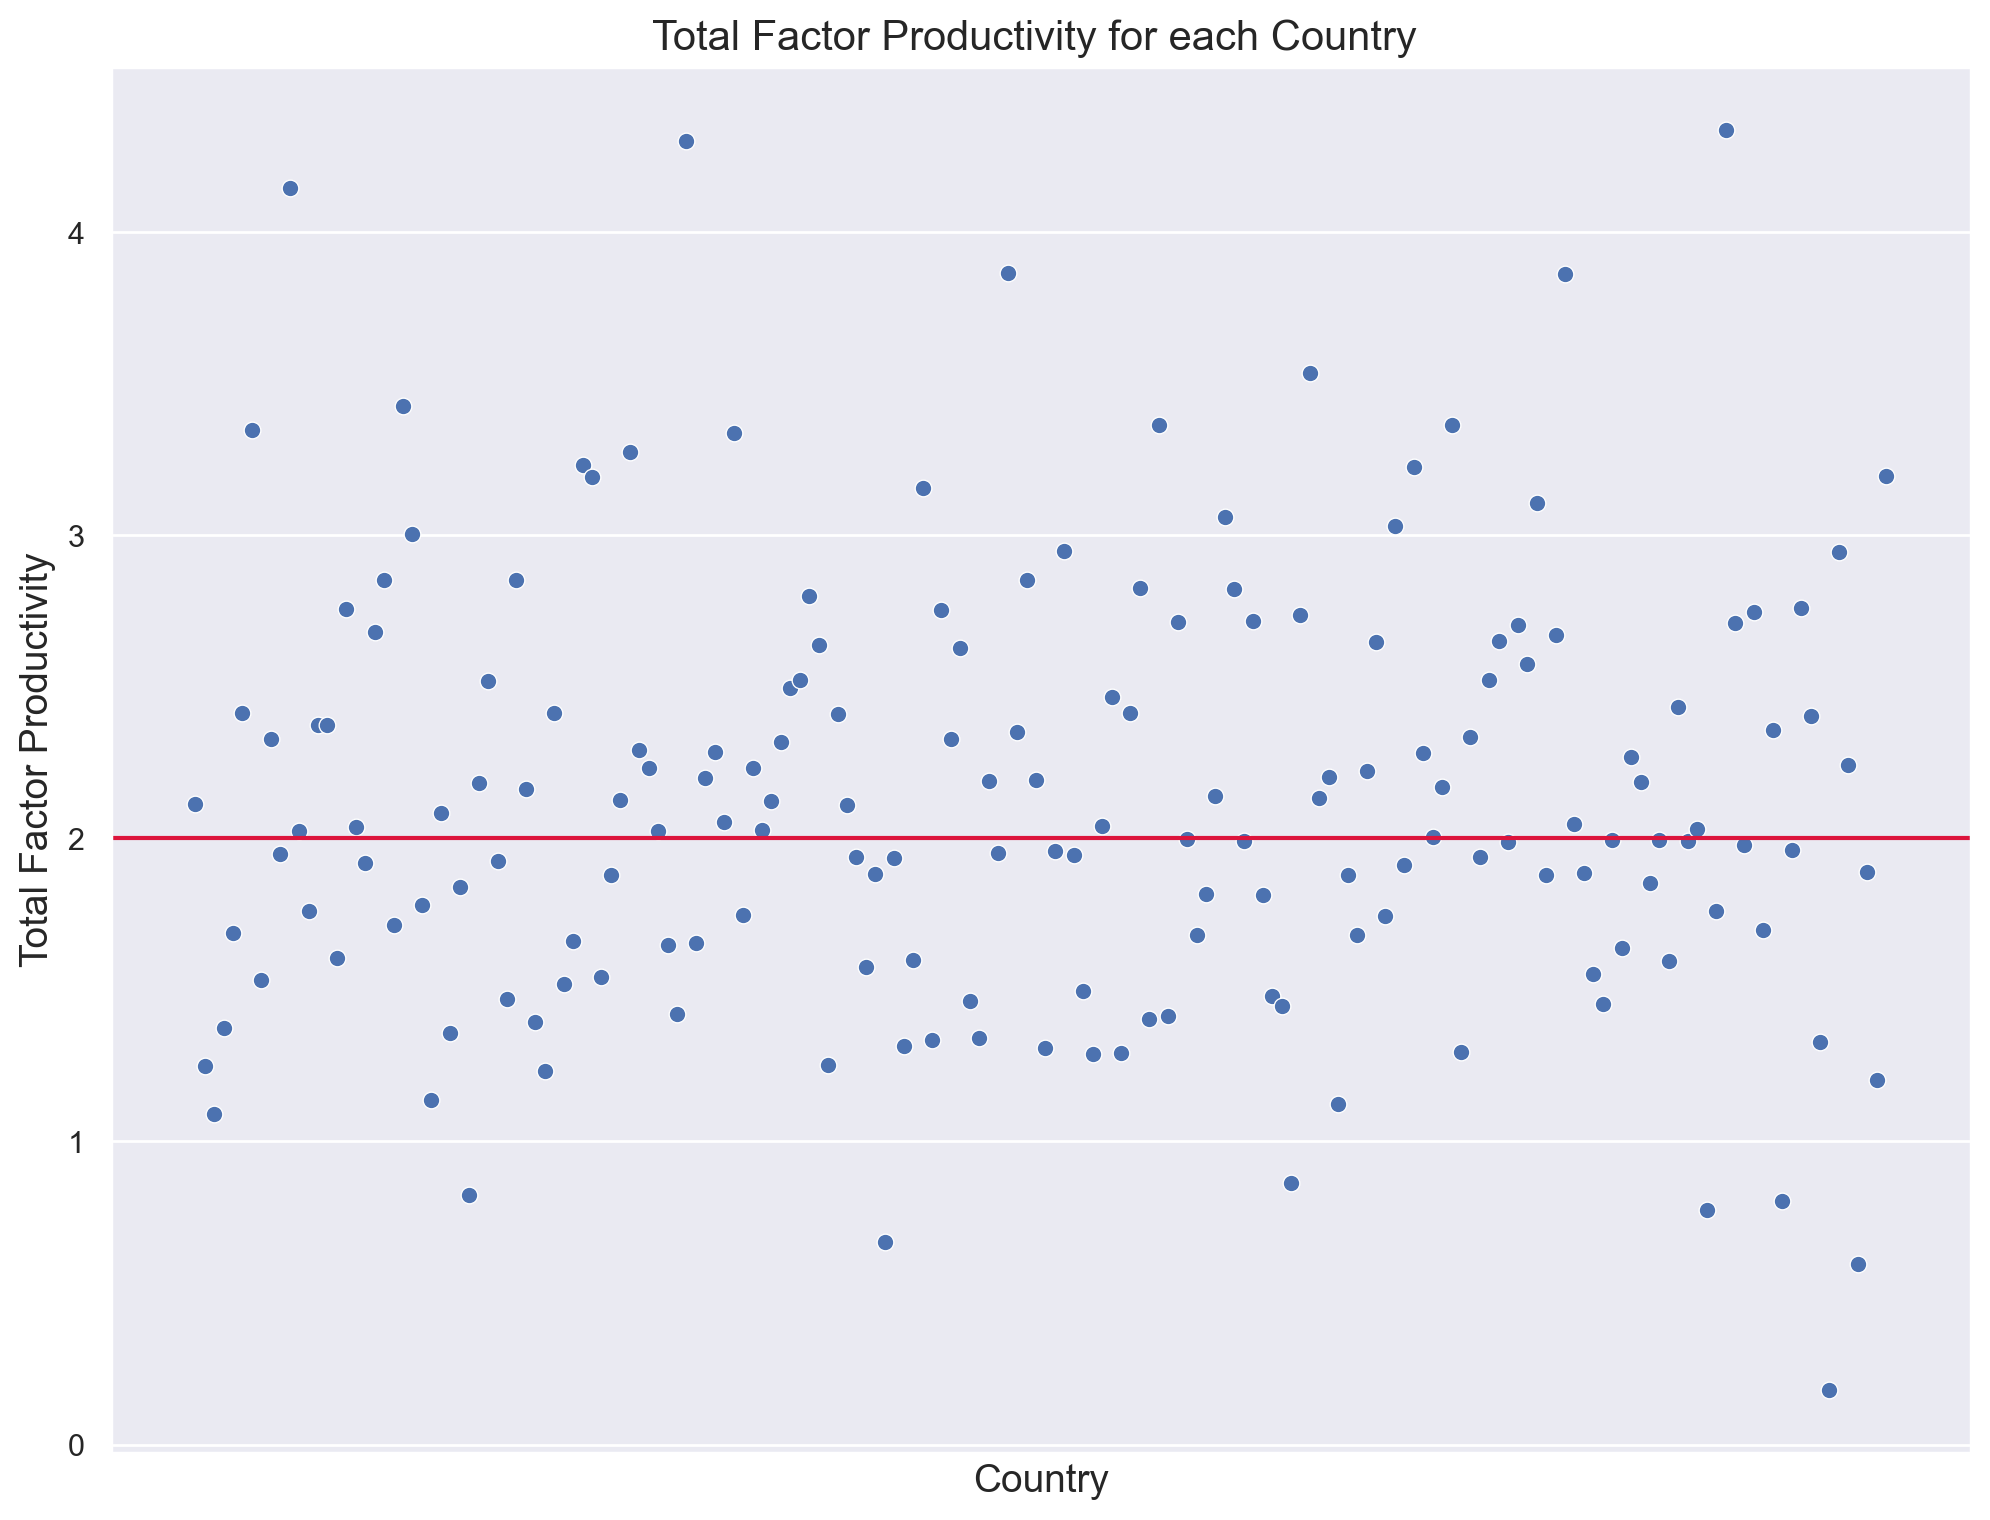

In [88]:
plt.figure(figsize=(12,9), dpi=200)
sns.set_theme()
sns.scatterplot(data=TFP, x=TFP.index, y='TFP')
plt.axhline(y=TFP_av, color='crimson')

plt.xlabel('Country', size=14)
plt.ylabel('Total Factor Productivity', size=14)
plt.title('Total Factor Productivity for each Country ', size=15)

plt.xticks([], [])
plt.show()